# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

---

**Disclaimer:**  
This notebook was AI-generated and has not been fully verified by a human expert. You should carefully review the code and results before drawing any conclusions or using them in your research.

---

## Overview

This notebook introduces and demonstrates how to access and analyze the data in [Dandiset 001174, version 0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218):  
**"Calcium imaging in SMA and M1 of macaques"**  

**Description:**  
This dataset provides in vivo calcium imaging recordings from the supplementary motor area (SMA) and primary motor cortex (M1) of rhesus macaques. The data includes one-photon miniscope calcium imaging from GCaMP-expressing neurons during rest and during a reaching task, with neuronal activity and ROI segmentations provided in NWB (Neurodata Without Borders) format.

**What this notebook covers:**  
- Dandiset metadata and structure overview  
- How to list and access available data files  
- Loading and summarizing a calcium imaging NWB file  
- Exploring neural activity with ROI fluorescence and event amplitude traces  
- Guidance for further exploration and analysis

---

## Required Packages

This notebook assumes the following packages are already installed:
- numpy
- matplotlib
- pandas
- pynwb
- h5py
- remfile

Please install them manually if needed. Do not use pip install commands within the notebook.

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pynwb
import h5py
import remfile

## Dandiset Metadata

- **Dandiset ID:** 001174, Version 0.250331.2218  
- **Title:** Calcium imaging in SMA and M1 of macaques  
- **Description:**  
    The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns.  
    This notebook demonstrates programmatic data access and exploratory analysis for this dataset.

- **Keywords:** One-photon calcium imaging, non-human primates, microendoscope, reaching task, neuronal coactivation, calcium sensors, GCaMP, GRIN lens  
- **Citation:** Galvan et al. (2025). Calcium imaging in SMA and M1 of macaques. DANDI Archive. [doi:10.48324/dandi.001174/0.250331.2218](https://doi.org/10.48324/dandi.001174/0.250331.2218)

[View this Dandiset on DANDI Archive](https://dandiarchive.org/dandiset/001174/0.250331.2218)

## Listing Some Assets in the Dandiset

We'll list several assets (files) available in this dandiset using the DANDI API.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Show basic information
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List first 5 assets
assets = dandiset.get_assets()
print("\nFirst 5 assets in the Dandiset:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets in the Dandiset:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Loading a NWB Calcium Imaging File

For illustration, we will load a relatively small NWB file from the Dandiset:

**File:** `sub-Q/sub-Q_ophys.nwb`  
**Asset ID:** `de07db56-e7f3-4809-9972-755c51598e8d`  
**URL:** `https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/`

> **View this NWB file in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft)**

We will use PyNWB and remfile to stream and interact with the data. Only a subset of data will be loaded for efficiency.

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print('NWB loaded.')
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject ID:", nwb.subject.subject_id)
print("Subject species:", nwb.subject.species)
print("File identifier:", nwb.identifier)
print("Available acquisitions:", list(nwb.acquisition.keys()))
print("Available processing modules:", list(nwb.processing.keys()))

NWB loaded.
Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2022-09-15 13:16:33.129000+00:00
Subject ID: Q
Subject species: Macaca mulatta
File identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Available acquisitions: ['OnePhotonSeries']
Available processing modules: ['ophys']


### NWB File Structure & Contents

- **acquisition['OnePhotonSeries']**: Raw calcium imaging video (shape: frames × height × width)
- **processing['ophys']['Fluorescence']['RoiResponseSeries']**: Fluorescence traces for segmented ROIs (cells)
- **processing['ophys']['EventAmplitude']**: Event-detected amplitude values for segmented ROIs

| Group                      | Key Data                                                   |
|----------------------------|------------------------------------------------------------|
| acquisition                | 'OnePhotonSeries': raw calcium video                       |
| processing['ophys']        | 'Fluorescence' (traces), 'EventAmplitude' (events),        |
|                            | 'ImageSegmentation' (ROI masks, not shown here)            |

*See NWB documentation for further reading on Neurodata Without Borders data format.*

## Exploration: ROI Fluorescence Traces

The **Fluorescence** module contains ΔF/F traces for individual segmented ROIs (cells), representing their activity over the entire recording.

The next cell retrieves and plots the fluorescence traces for the first 5 ROIs.
(Note: Only a subset is shown for clarity and performance.)

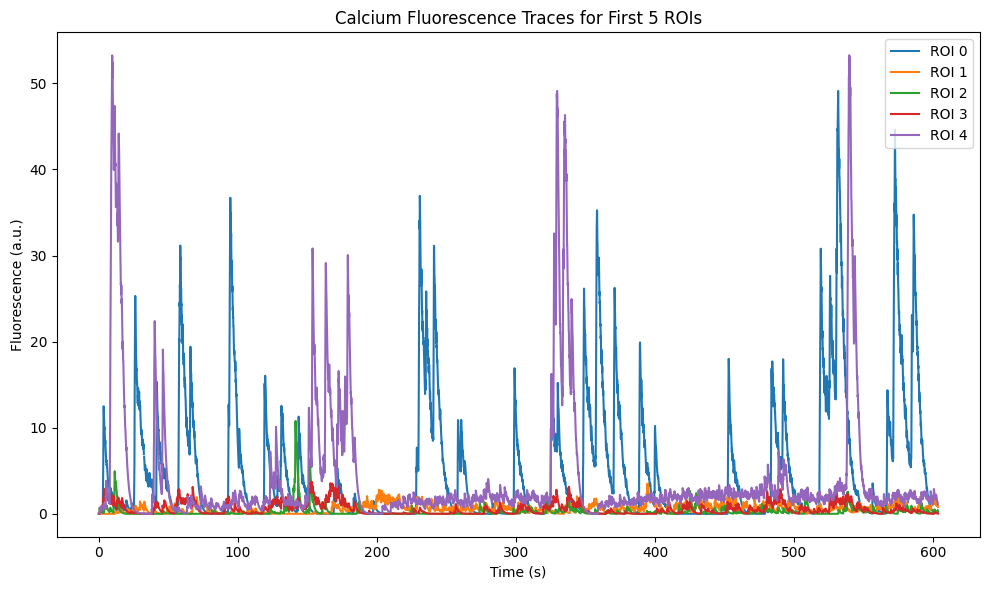

In [4]:
roi_resp = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']
fluor_data = roi_resp.data[:, :5]  # First 5 ROIs, all timesteps
n_time = fluor_data.shape[0]
rate = roi_resp.rate
time = np.arange(n_time) / rate

plt.figure(figsize=(10, 6))
for i in range(fluor_data.shape[1]):
    plt.plot(time, fluor_data[:, i], label=f'ROI {i}')
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Calcium Fluorescence Traces for First 5 ROIs')
plt.legend()
plt.tight_layout()
plt.show()

*The calcium fluorescence traces above show pronounced activity and variability, with clear dynamic changes that reflect the activity patterns of different neurons.*

## Exploration: Event Amplitude Traces

The **EventAmplitude** module provides event-detected amplitude values (sparser than raw traces, marking putative neural firing events) for each ROI.

The following cell retrieves and plots event amplitude traces for the first 5 ROIs. These allow investigation of discrete activity events across time.

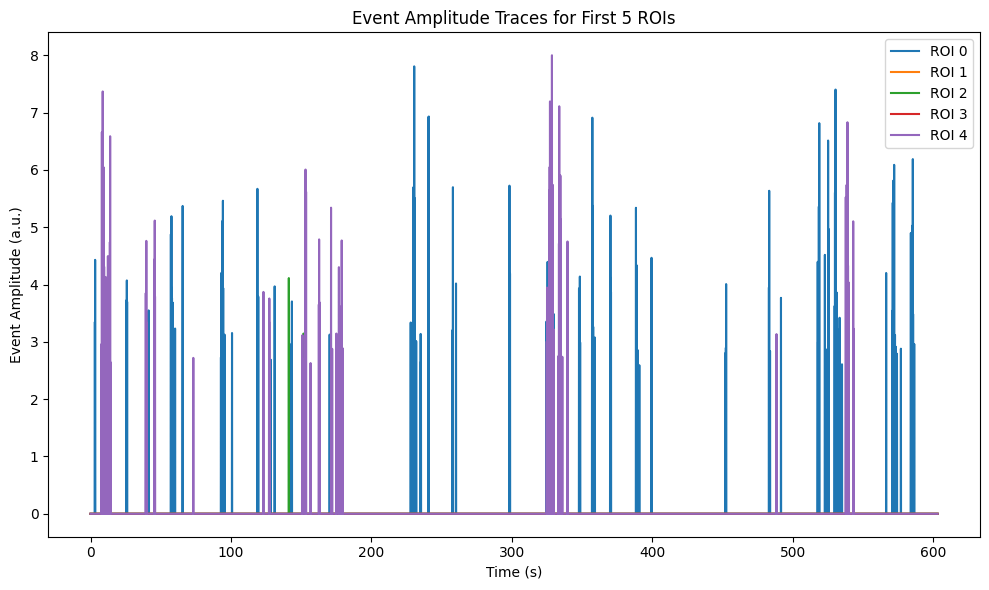

In [5]:
event_amp = nwb.processing['ophys'].data_interfaces['EventAmplitude']
amp_data = event_amp.data[:, :5]  # First 5 ROIs, all timesteps
n_time2 = amp_data.shape[0]
rate2 = event_amp.rate
time2 = np.arange(n_time2) / rate2

plt.figure(figsize=(10, 6))
for i in range(amp_data.shape[1]):
    plt.plot(time2, amp_data[:, i], label=f'ROI {i}')
plt.xlabel('Time (s)')
plt.ylabel('Event Amplitude (a.u.)')
plt.title('Event Amplitude Traces for First 5 ROIs')
plt.legend()
plt.tight_layout()
plt.show()

*Event amplitude traces illustrate the timing and magnitude of discrete neural activity events, with clear, isolated peaks corresponding to detected transients.*

## Summary and Future Directions

This notebook demonstrated how to:
- Access a calcium imaging Dandiset and enumerate assets via the DANDI API.
- Load a representative NWB file and examine metadata, structure, and core content.
- Visualize neural fluorescence activity and event amplitude traces for individual neurons (ROIs).

**Key observations:**
- ROI traces display both continuous and event-based neural activity with pronounced variability between cells.
- Underlying imaging frames have strong background/vignetting—additional preprocessing/normalization may be required for imaging analysis.

**Possible next steps for further analysis:**
- Examine or visualize additional ROIs across the experiment.
- Explore ROI segmentation masks spatially (using nwb.processing['ophys'].data_interfaces['ImageSegmentation']).
- Correlate neural events with behavioral or task conditions, if available.
- Use or extend this code as a basis for batch or comparative analyses across datasets or sessions.

For further documentation and advanced exploration, see the [DANDI API documentation](https://www.dandiarchive.org/) and [PyNWB documentation](https://pynwb.readthedocs.io/).